### **IS 545 Object Oriented Programming and Data Structures**

# Assignment 2

Upload your solutions (as an **ipynb** file) to the [odtuclass](https://odtuclass.metu.edu.tr/) web site for the course.

**Deadline:** As announced in Assignment web page.

**Late submissions:** Will incur a -1% penalty per hour after the deadline.

You are expected to work **by yourselves**,  <u>NOT in groups</u>. You are also be expected to follow **the academic integrity rules**.

## Requirements
- You are not allowed to copy code snippets from the internet, these attempts will get **zero points** for the related question.
- Make sure you write your code starting from the next line after phrases like `YOUR CODE HERE` or `YOUR ANSWER HERE`
- Do not change any code given in the questions other than the area described above
- `MAKE SURE THAT WHEN YOU TEST A CELL, YOU EXECUTE **ALL THE CELLS ABOVE IT**`

## Student Info (fill the fields below)

Name: Esra Şekerci

ID: 2698215

## Description
In this assignment, you will implement an efficient Python array suite. The usage of this array will be very similar to the array in Numpy module. Unlike Numpy arrays, our array will support one dimensional floating point numbers only.

Most of the suite will be available to you and you will only fill some missing codes in the classes. DO NOT CHANGE any code other than the regions reserved for the students because grading will be performed using the original version of the codes!

There will be four different implementation of array storages in this assignment, one of them is provided to you and you will implement others. When you examine the code, hopefully, you will understand the meaning of the following OOP features better:
- Encapsulation
- Inheritance
- Polymorphism
- Reuse

You will also implement a computation about the slicing property of the arrays.



## Remarks
- In a real-world application, you should have created a module directory containing a set of **.py** files for this suite of classes
- In this assignment, in order to make submissions easier, all classes are stored in a single Jupyter Notebook file

### ArrayWrapper Class (do not modify) ###
This class wraps the array sources and should not be modified.

In [1]:
class ArrayWrapper:
    """
    Wraps an array-source and provides convenience methods for
    representation, string conversion, arithmetic operators, 
    indexing and slicing
    """

    def __init__(self, source):
        if not isinstance(source, ArraySource):
            raise ValueError("ArraySource instance expected")
        self._source = source
                
    @staticmethod
    def __create_source(cls, count):
        """Creates a new instance of ValueArraySource 
        with the type given in the cls parameter
        Size of the array-source is set to count"""
        if count<0:
            raise ValueError("Array length cannot be negative")
        src = super(ArraySource, cls).__new__(cls, count)
        src.__init__(count)
        return src

    def __neg__(self):
        return self * (-1)

    def __iadd__(self, other):
        if isinstance(other, ArrayWrapper):
            #if the argument is another float array, add individual items 
            count = len(other)
            if len(self) != count : 
                raise ValueError("Length of the arrays do not match")
            self.__add_array(other)
            return self
        else:
            self.__add_scalar(other)
            return self

    def __add__(self, other):
        cpy = self.copy()
        cpy += other
        return cpy

    def __radd__(self, other):
        return self + other

    def __imul__(self, other):
        if isinstance(other, ArrayWrapper):
            #if the argument is another float array, multiply individual items 
            count = len(other)
            if len(self) != count : 
                raise ValueError("Length of the arrays do not match")
            self.__mul_array(other)
            return self
        else:
            self.__mul_scalar(other)
            return self

    def __mul__(self, other):
        cpy = self.copy()
        cpy *= other
        return cpy

    def __rmul__(self, other):
        return self * other

    def __sub__(self, other):
        return self + (-other)

    def __isub__(self, other):
        self += (-other)
        return self

    def __rsub__(self, other):
        return -self + other

    def __truediv__(self, other):
        cpy = self.copy()
        cpy /= other
        return cpy

    def __itruediv__(self, other):
        if isinstance(other, ArrayWrapper):
            #if the argument is another float array, multiply individual items 
            count = len(other)
            if len(self) != count : 
                raise ValueError("Length of the arrays do not match")
            self.__div_array(other, False)
            return self
        else:
            self.__div_scalar(other, False)
            return self

    def __rtruediv__(self, other):
        cpy = self.copy()
        if isinstance(other, ArrayWrapper):
            #if the argument is another float array, multiply individual items 
            count = len(other)
            if len(cpy) != count : 
                raise ValueError("Length of the arrays do not match")
            cpy.__div_array(other, True)
        else:
            cpy.__div_scalar(other, True)
        return cpy

    def __repr__(self):
        s = "array(["
        for i in range(len(self)):
            f = self[i]
            if i>0 : s += ', '
            s += str(f)
        return s + '])'

    def __str__(self):
        s = "["
        for i in range(len(self)):
            if i>0 : s += ' '
            f = self[i]
            s += str(f)
        return s + "]"

    def __eq__(self, other):
        count = len(self)
        if count != len(other): return False
        for i in range(count):
            if self[i] != other[i]: return False
        return True

    def __pow__(self, exp):
        ret = self._create_new(len(self))
        for i in range(len(ret)):
            ret[i] = self[i] ** exp
        return ret

    def __len__(self):
        return self._source.get_length()

    def __getitem__(self, key):
        if type(key) == slice:
            refarr = ReferenceArraySource(self._source, key)
            return ArrayWrapper(refarr)
        else:
            return self._source.get_value(key)

    def __setitem__(self, key, value):
        self._source.set_value(key, value)

    def copy(self):
        cpy = self._create_new(len(self))
        for i in range(len(self)):
            cpy._source.set_value(i, self._source.get_value(i))
        return cpy

    def _create_new(self, count):
        src = self._source
        if type(src) == ReferenceArraySource:
            src = src.get_ref_source()
        newsrc = ArrayWrapper.__create_source(type(src), count)
        return ArrayWrapper(newsrc)

    def _convert_value(self, value):
        return value

    def __add_scalar(self, scalar):
        val = self._convert_value(scalar)
        for i in range(len(self)):
            self[i] += val

    def __add_array(self, array):
        for i in range(len(self)):
            self[i] += self._convert_value(array[i])

    def __mul_scalar(self, scalar):
        val = self._convert_value(scalar)
        for i in range(len(self)):
            self[i] *= val

    def __mul_array(self, array):
        for i in range(len(self)):
            self[i] *= self._convert_value(array[i])

    def __div_scalar(self, scalar, invert):
        val = self._convert_value(scalar)
        if invert:
            for i in range(len(self)):
                self[i] = val / self[i]
        else:
            for i in range(len(self)):
                self[i] /= val

    def __div_array(self, array, invert):
        if invert:
            for i in range(len(self)):
                self[i] = self._convert_value(array[i]) / self[i]
        else:
            for i in range(len(self)):
                self[i] /= self._convert_value(array[i])


### ArraySource Class (do not modify)
This is the abstract base class of all one dimensional float array sources. Subclasses should implement the abstract methods. ArrayWrapper class wraps instances of this object and provides numpy-like array operations. Read the documentation given in the abstract method definitions below.

In [2]:
from abc import ABC, abstractmethod

class ArraySource(ABC):
    """
    Base class of all array sources
    """

    def __check_index_valid(self, index):
        if type(index) != int:
            raise IndexError("Index should be integer")
        count = self.get_length()
        if(index < 0 or index >= count):
            raise IndexError("Index out of range")

    def get_value(self, index):
        self.__check_index_valid(index)
        return self._get_value(index)

    def set_value(self, index, value):
        self.__check_index_valid(index)
        return self._set_value(index, float(value))

    @abstractmethod
    def get_length(self):
        """Returns number of items in the array"""
        pass

    @abstractmethod
    def _get_value(self, index):
        """
        Returns the float value at index
        The index value is guaranteed to be in range 0 to length-1
        """
        pass

    @abstractmethod
    def _set_value(self, index, fvalue):
        """
        Sets the array content at index to the float value given in fvalue
        The index value is guaranteed to be in range 0 to length-1
        """
        pass


### ValueArraySource (do not modify)
This is the abstract base class of all array-source implementations that does a memory allocation for the array. Descendants should override abstract methods of this class, read the method documentation below for these methods.

In [3]:
class ValueArraySource(ArraySource):

    def __init__(self, object):
        if type(object) == int:
            # if object is int, it is considered as the length of the array
            count = object
            self._count = count
            self._allocate(count)
        else:
            # otherwise object is iterable like range(..) or any sequence
            count = len(object)       
            self._count = count
            self._allocate(count)
            for i in range(count):            
                self.set_value(i, object[i])

    def get_length(self):
        """Returns length (size) of the underlying array storage"""
        return self._count

    @abstractmethod
    def _allocate(self, count):
        """Allocates memory for the underlying array storage
        and stores this object in a field"""
        pass


### AArraySource Class (do not modify) ##
A concrete implementation of ValueArraySource that uses **array** module provided for low level array operations in python. Use this class as an example for further implementations in the corresponding questions

In [4]:
import array

class AArraySource(ValueArraySource):

    def _allocate(self, count):
        self._aarray = array.array('f', [0]*count)

    def _get_value(self, index):
        return self._aarray[index]

    def _set_value(self, index, fvalue):
        self._aarray[index] = fvalue


### ReferenceArraySource (do not modify) ##
Important note: this class uses a function called **compute_indices** which is not implemented properly. You will complete this implementation in the related question.

This class is an implementation of ArraySource but it does not do any memory allocation. It takes an existing ValueArraySource as reference and gets the data from this reference.

This class is used for slicing operations. Just as in numpy arrays, this structure is a view of an existing array. When you do changes on this reference, the referenced array is also changed

In [5]:
class ReferenceArraySource(ArraySource):

    def __init__(self, ref_source, slc):
        if not isinstance(ref_source, ArraySource):
            raise ValueError("ref_source should be a ArraySource")
        if type(slc) != slice:
            raise ValueError("slc must be of type slice")
        if(slc.step == 0): 
            raise ValueError("slice step cannot be zero")
        oldcount = ref_source.get_length()
        if type(ref_source) == ReferenceArraySource:
            self._ref_source = ref_source._ref_source
            oldstart = ref_source._start
            oldinc = ref_source._increment
        else:
            self._ref_source = ref_source
            oldstart = 0
            oldinc = 1
        indices = compute_indices(slc, oldstart, oldinc, oldcount)
        self._start, self._increment, self._count = indices     

    def get_ref_source(self):
        """Getter for the referenced array source"""
        return self._ref_source

    def get_length(self):
        return self._count

    def _get_value(self, index):
        i = self._start + index * self._increment
        return self._ref_source._get_value(i)

    def _set_value(self, index, fvalue):
        i = self._start + index * self._increment
        self._ref_source._set_value(i, fvalue)



### Utility class fa (do not modify) ##
This class provides convenience methods for array operations. Just as you use numpy module with **np**, you will use our arrays suite using **fa**. This module has methods to create arrays and apply some math functions on the arrays (like square-root, sin, abs etc.)

In [6]:
import math

class fa:
    
    @staticmethod
    def a_array(object):
        return ArrayWrapper(AArraySource(object))

    @staticmethod
    def c_array(object):
        return ArrayWrapper(CArraySource(object))

    @staticmethod
    def l_array(object):
        return ArrayWrapper(LArraySource(object))

    @staticmethod
    def d_array(object):
        return ArrayWrapper(DArraySource(object))

    @staticmethod
    def _apply_all(arr, func):
        if not isinstance(arr, ArrayWrapper):
            raise ValueError("ArrayBase instance is expected")
        cpy = arr.copy()
        for i in range(len(arr)):
            cpy[i] = func(arr[i])
        return cpy

    @staticmethod
    def abs(arr):
        return fa._apply_all(arr, __builtin__.abs)

    @staticmethod
    def sin(arr):
        return fa._apply_all(arr, math.sin)

    @staticmethod
    def sqrt(arr):
        return fa._apply_all(arr, math.sqrt)


### Usage of our arrays ##
In the following cells you can see examples about the usage of the classes defined upto now

In [7]:
# the following code creates an array based AArraySource with zeros
ArrayWrapper(AArraySource(5))

array([0.0, 0.0, 0.0, 0.0, 0.0])

In [8]:
# shorthand usage to do the same thing above with fa utility class
fa.a_array(5)

array([0.0, 0.0, 0.0, 0.0, 0.0])

In [9]:
# you can use iterators or sequences to generate arrays as well
fa.a_array(range(5)) # same as ArrayWrapper(AArraySource(range(5)))

array([0.0, 1.0, 2.0, 3.0, 4.0])

In [10]:
# usage with sequences
fa.a_array([5,4,3])

array([5.0, 4.0, 3.0])

In [11]:
# arithmetic operations on the arrays (like numpy)
fa.a_array(range(5)) * 5 + 10

array([10.0, 15.0, 20.0, 25.0, 30.0])

In [12]:
fa.a_array([1,2,3]) + fa.a_array([80,70,60])

array([81.0, 72.0, 63.0])

### Question 1 (20 pts)
Complete the following code to implement a ValueArraySource that uses a list object internally. 

Note that this is a very simple question and you are expected to write **a single statement** to each cell. 

In [13]:
class LArraySource(ValueArraySource):

    def _allocate(self, count):
        # ============ YOUR CODE HERE ============
        self._list = [0.0] * count # replace to create a list containing count times zeros
        # ========================================

    def _get_value(self, index):
        # ============ YOUR CODE HERE ============
        return self._list[index] # retrieve the value at the specified index from the list
        # ========================================

    def _set_value(self, index, fvalue):
        # ============ YOUR CODE HERE ============
        self._list[index] = fvalue  # set the value at the specified index in the list
        # ========================================

In [14]:
# you can test your code using this code
ArrayWrapper(LArraySource(5)) # this should generate an array with zeros

array([0.0, 0.0, 0.0, 0.0, 0.0])

In [15]:
# short way to do the same
fa.l_array(5)

array([0.0, 0.0, 0.0, 0.0, 0.0])

In [16]:
fa.l_array(range(5)) # should generate array([0.0, 1.0, 2.0, 3.0, 4.0])

array([0.0, 1.0, 2.0, 3.0, 4.0])

### Question 2 (20 pts) ##
Complete the following code to implement a ValueArraySource that uses a ctypes array internally.

Note that this is a very simple question and you are expected to write **a single statement** to each cell. 

In [17]:
from ctypes import c_double

class CArraySource(ValueArraySource):

    def _allocate(self, count):
        self._carray = (c_double * count)() # allocate a ctypes array of c_double with the specified count

    def _get_value(self, index):
        # ============ YOUR CODE HERE ============
        return self._carray[index] # retrieve the value at the specified index from the ctypes array
        # ========================================
 
    def _set_value(self, index, fvalue):
        # ============ YOUR CODE HERE ============
        self._carray[index] = c_double(fvalue) # set the value at the specified index in the ctypes array
        # ========================================

In [18]:
# test your code
ArrayWrapper(CArraySource(range(4))), fa.c_array(3)
# (array([0.0, 1.0, 2.0, 3.0]), array([0.0, 0.0, 0.0]))

(array([0.0, 1.0, 2.0, 3.0]), array([0.0, 0.0, 0.0]))

### Question 3 (30 pts) ##
Complete the following code to implement a ValueArraySource that uses a dictionary internally.

However, this time you will assume that the underlying array is sparse, i.e. most of the cells will be zero. The underlying dictionary will hold only the non-zero values internally. For example, if you have an array with length 1000 and if all the values are 0.0, the underlying dictionary will be empty. If you set a cell to a nonzero value, only this value should exist in the dictionary. And when you set some value to zero at some index, this item should be removed from the dictionary.



In [19]:
class DArraySource(ValueArraySource):

    def _allocate(self, count):
        self._dict = {} #initially dictionary is empty

    def _get_value(self, index):
        # if index exists in the dicionary as the key
        # return the value at that key
        # else return 0.0
        # ============ YOUR CODE HERE ============        
        return self._dict.get(index, 0.0)
        # ========================================

    def _set_value(self, index, fvalue):
        # if fvalue is 0.0 remove corresponding item from the dictionary
        # else add that key-value pair to the dictionary
        # ============ YOUR CODE HERE ============
        if fvalue == 0.0:
            self._dict.pop(index, None)
        else:
            self._dict[index] = fvalue
        # ========================================

In [20]:
# test your code
ArrayWrapper(DArraySource(4)), fa.d_array(range(3))
# (array([0.0, 0.0, 0.0, 0.0]), array([0.0, 1.0, 2.0]))

(array([0.0, 0.0, 0.0, 0.0]), array([0.0, 1.0, 2.0]))

In [21]:
fa.d_array(5)._source._dict #this should return empty dictionary

{}

In [22]:
fa.d_array(range(3))._source._dict #this should return {1: 1.0, 2: 2.0}

{1: 1.0, 2: 2.0}

In [23]:
# you should also test inserting/removing zero and non-zero items by yourselves

# create an instance of DArraySource
arr_test = fa.d_array(5)

# initially, the underlying dictionary should be empty
print(arr_test._source._dict)

# set a cell to a non-zero value
arr_test[2] = 42.0
print(arr_test._source._dict)

# set another cell to non-zero value
arr_test[4] = 7.0
print(arr_test._source._dict)

# set a cell to zero
arr_test[2] = 0.0
print(arr_test._source._dict)

# set a cell to a non-zero value again
arr_test[1] = 99.0
print(arr_test._source._dict)

{}
{2: 42.0}
{2: 42.0, 4: 7.0}
{4: 7.0}
{4: 7.0, 1: 99.0}


### Question 4 (30 pts) ##
Now, you will implement the slicing capability for our array. For extra details, you should see the ReferenceArraySource implementation.

When an array is sliced, a slice object is created by the python engine and it is available in the constructor of this implementation. 

ReferenceArraySource is a view of the referenced array, it does not do any extra memory allocation, it will just access the referenced array. Which means, when you change an item in the view, the referenced object will also change. This behavior is same as the numpy module arrays.

ReferenceArraySource has a ref_source parameter in its constructor. Behavior depends on the type of this object:

If referenced object is a ValueArraySource, old (start,increment,count) parameters will span the whole referenced array, i.e. it will be (0,1,referenced-array-length)

On the other hand, if we slice a previously sliced array, this time the referenced object will be a ReferenceArraySource instance. In this case, old (start,increment,count) parameters will be the ones stored in the referenced object.

You will implement the code in the compute_indices function below. This function will compute new (start,increment,count) values based on the old values and the slice object. These new values will be stored in the ReferenceArraySource instance.

For example if your actual array is `arr = [0,1,2,3,..11]`, and if it is sliced as `sarr = arr[3:10:2]`, the resulting view will be `[3,5,7,9]`. In this case, in the compute_indices function slc will be `slice(start=3,stop=10,step=2)` and old (start,step,count) will be (0,1,12), and you should compute new (start,step,count) as (3,2,4). Then, if you re-slice new array as `sarr[1:3]`, slc will be `slice(start=1,stop=3,step=None)` and the new view will be `[5,7]`, old and new tuple will be (3,2,4) and (5,2,2) respectively. In other words:

|Statement|||||||||||||old values|compute_index returns|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|arr = list(range(12))|0|1|2|3|4|5|6|7|8|9|10|11||
|sarr = arr[3:10:2]||||X||X||X||X|||(0,1,12)|(3,2,4)|
|sarr[1:3]||||||Y||Y|||||(3,2,4)|(5,2,2)|

``` python
compute_index(slc = 3:10:2, oldstart = 0, oldincr = 1, oldcount = 12) should return (3, 2, 4)
compute_index(slc = 1:3, oldstart = 3, oldincr = 2, oldcount = 4) should return (5, 2, 2)
```

Hint: In order to test your code, you can do the same slicing with a list object and the results of slicing and nested slicings should return exactly the same sequence.

Inputs:
- slc : the slice object
- oldstart,oldinc,oldcount : old parameters

Output:
- tuple of (newstart,newinc,newcount)




In [24]:
def compute_indices(slc, oldstart, oldinc, oldcount):
    """Computes and returns indices for the new"""
    newstart = oldstart
    newinc = oldinc
    newcount = oldcount
    # ============ YOUR CODE HERE ============
    # if slc.start is not None, update newstart accordingly
    start = slc.start if slc.start is not None else 0
    newstart = oldstart + start * oldinc

    # if slc.stop is not None, update newcount and newinc accordingly
    stop = slc.stop if slc.stop is not None else oldcount
    step = slc.step if slc.step is not None else 1
    newinc = oldinc * step
    newcount = min((stop - start - 1) // step + 1, oldcount - start)
    # ========================================
    return newstart, newinc, newcount

In [25]:
# test your code
arr = fa.a_array(range(12))
arr
# array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0])

array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0])

In [26]:
sarr = arr[3:10:2]
sarr
# array([3.0, 5.0, 7.0, 9.0])

array([3.0, 5.0, 7.0, 9.0])

In [27]:
sarr[1:3]
#array([5.0, 7.0])

array([5.0, 7.0])

In [28]:
#let's do similar things with built-in list object
lst = list(range(0,12))
print(lst)
slst= lst[3:10:2]
print(slst)
print(slst[1:3])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[3, 5, 7, 9]
[5, 7]


## Usage of this array suite with other libraries #
You can use these arrays with modules like matplotlib as well, just as the way  you do with numpy arrays.


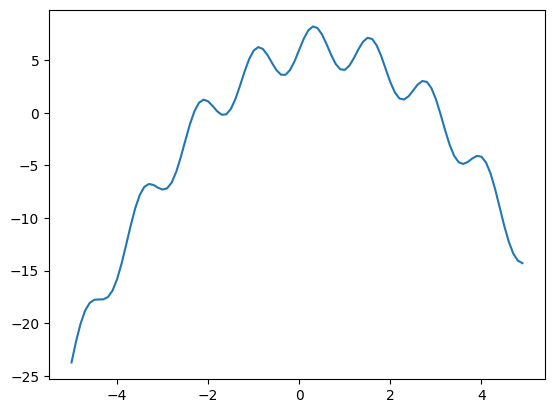

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
x = fa.a_array(range(-50,50))
x *= 0.1
plt.plot(x, (3-x)*(x+2) + 2 * fa.sin(5*x))